In [1]:
import pandas as pd
from wildlife_datasets.datasets import Cows2021v2, LeopardID2022, HyenaID2022, SeaTurtleID2022
from wildlife_tools.data.dataset import WildlifeDataset


In [8]:
df1 = LeopardID2022('/home/wellvw12/leopard').df
df2 = HyenaID2022('/home/wellvw12/hyenaid2022').df

# df2['identity'] == df1['identity']
df3 = pd.concat([df2,df1], ignore_index=True)
df3.to_csv('/home/wellvw12/lep_hyn/combined.csv', index=False)
data = WildlifeDataset(df3, '/home/wellvw12/lep_hyn')

In [ ]:

import pandas as pd
from czechlynx_federated_dataset import CzechLynxDataset
df = pd.read_csv('lynx_metadata.csv')
CzechLynxDataset('/home/wellvw12/.cache/kagglehub/datasets/picekl/czechlynx/versions/6',df)

Exception: root does not exist. You may have have mispelled it.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("picekl/czechlynx")
a
print("Path to dataset files:", path)

100%|██████████| 11.4G/11.4G [01:16<00:00, 160MB/s] 

Extracting files...


Path to dataset files: /home/wellvw12/.cache/kagglehub/datasets/picekl/czechlynx/versions/6


In [6]:
from czechlynx_federated_dataset import CzechLynxFederatedManager

# Initialize with actual Czech Lynx image directory
federation = CzechLynxFederatedManager('/home/wellvw12/.cache/kagglehub/datasets/picekl/czechlynx/versions/6/CzechLynx')

# Access individual clients
beskydy_client = federation.get_client('beskydy')
nps_client = federation.get_client('nps')
sumava_client = federation.get_client('sumava')

In [9]:
beskydy_client.metadata

,image_id,identity,path,source_region,date,relative_age,location,latitude,longitude,encounter,client_id
0,0,lynx_014,CzechLynx/beskydy/lynx_014/00000_lynx_014.png,beskydy,2012-03-03,3.0,horni_becva-1,49.39917,18.34007,4879,client_0_beskydy
1,1,lynx_014,CzechLynx/beskydy/lynx_014/00001_lynx_014.png,beskydy,2012-04-14,3.0,horni_becva-1,49.39917,18.34007,5188,client_0_beskydy
2,2,lynx_184,CzechLynx/beskydy/lynx_184/00002_lynx_184.png,beskydy,2012-02-20,0.0,morkov-1,49.50851,18.08081,4875,client_0_beskydy
3,3,lynx_184,CzechLynx/beskydy/lynx_184/00003_lynx_184.png,beskydy,2012-02-20,0.0,morkov-1,49.50851,18.08081,4875,client_0_beskydy
4,4,lynx_184,CzechLynx/beskydy/lynx_184/00004_lynx_184.png,beskydy,2012-02-22,0.0,morkov-1,49.50851,18.08081,4876,client_0_beskydy
...,...,...,...,...,...,...,...,...,...,...,...
17684,17684,lynx_167,CzechLynx/beskydy/lynx_167/17684_lynx_167.png,beskydy,2024-10-18,6.0,moravka-1,49.56739,18.50838,3343,client_0_beskydy
17685,17685,lynx_167,CzechLynx/beskydy/lynx_167/17685_lynx_167.png,beskydy,2024-10-18,6.0,moravka-1,49.56739,18.50838,3344,client_0_beskydy
17686,17686,lynx_167,CzechLynx/beskydy/lynx_167/17686_lynx_167.png,beskydy,2024-10-18,6.0,moravka-1,49.56739,18.50838,3344,client_0_beskydy
17687,17687,lynx_167,CzechLynx/beskydy/lynx_167/17687_lynx_167.png,beskydy,2024-10-18,6.0,moravka-1,49.56739,18.50838,3344,client_0_beskydy


In [1]:
from wildlife_datasets import datasets, splits
from wildlife_datasets.datasets import Cows2021v2, LeopardID2022, HyenaID2022, SeaTurtleID2022, MacaqueFaces
import os

dataset = LeopardID2022('/home/wellvw12/leopard').metadata
dataset.to_csv("annotations.csv")
metadata = dataset
splitter = splits.DisjointSetSplit(0.2)
idx_train, idx_test = splitter.split(metadata)[0]

metadata.loc[metadata.index[idx_train], 'split'] = 'train'
metadata.loc[metadata.index[idx_test], 'split'] = 'test'

os.makedirs(f'metadata/maq/', exist_ok=True)
metadata.to_csv(f'metadata/maq/metadata.csv')



# transform = T.Compose([
#     T.Resize(size=(224, 224)),
#     T.ToTensor(),
#     T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
# ])
# # for training
# train = WildlifeDataset(
#     metadata = metadata.query('split == "train"'), 
#     root = image_root,
#     transform=transform
# )
# # for evaluation
# database = WildlifeDataset(
#     metadata=metadata.query('split == "train"'),
#     root=f'{root_images}/{name}/',
#     transform=transform,
# )

# query = WildlifeDataset(
#     metadata=metadata.query('split == "test"'),
#     root=f'{root_images}/{name}/',
#     transform=transform,
# )

# df = dataset.df
# splitter = splits.DisjointSetSplit(0.2)
# for idx_train, idx_test in splitter.split(df):
#     splits.analyze_split(df, idx_train, idx_test)
#     print(idx_train, idx_test)
#     break

In [9]:
dataset.metadata

,image_id,identity,path,date,category
0,0,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_1.jpg,2014-07-03,Contrast
1,1,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_2.jpg,2014-07-03,Contrast
2,2,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_3.jpg,2014-08-06,Contrast
3,3,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_4.jpg,2014-08-06,Contrast
4,4,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_5.jpg,2014-06-12,Contrast
...,...,...,...,...,...
6275,6275,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6276.jpg,2014-02-19,Random
6276,6276,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6277.jpg,2014-02-19,Random
6277,6277,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6278.jpg,2014-03-21,Random
6278,6278,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6279.jpg,2014-02-19,Random


In [ ]:
from wildlife_tools.data.dataset import WildlifeDataset
from wildlife_datasets.datasets import Cows2021v2, LeopardID2022, HyenaID2022
from torch.utils.data import ConcatDataset


m1 = LeopardID2022('/home/wellvw12/leopard')
m2 = HyenaID2022('/home/wellvw12/hyenaid2022')

meta3 = pd.concat([m1.df,m2.df],ignore_index=True)
leopard_gallery = WildlifeDataset(m1.df, m1.root)
# hyena_gallery = WildlifeDataset(m2.df, m2.root)



In [2]:
import pandas as pd
df = pd.read_csv("/home/wellvw12/fedwild/data/test.csv")
# df2 = pd.read_csv("/home/wellvw12/client_data_non_iid/6/query.csv")
# df3 = pd.read_csv("/home/wellvw12/client_data_non_iid/6/gallery.csv")
df['identity'].value_counts()

identity
0    190
1    190
3    190
5    190
4    190
6    190
2    180
Name: count, dtype: int64

In [1]:
import pandas as pd

# Read the CSV files
df = pd.read_csv("/home/wellvw12/client_data_non_iid/6/train.csv")
df2 = pd.read_csv("/home/wellvw12/client_data_non_iid/6/query.csv")
df3 = pd.read_csv("/home/wellvw12/client_data_non_iid/6/gallery.csv")

# Assuming the ID column is named 'id' - change this if it has a different name
id_column = 'identity'  # Adjust this if your ID column has a different name

# Get unique IDs from each dataset
train_ids = set(df[id_column].unique())
query_ids = set(df2[id_column].unique())
gallery_ids = set(df3[id_column].unique())

# Check if all query IDs are in gallery
all_query_in_gallery = query_ids.issubset(gallery_ids)
print(f"All query IDs are in gallery: {all_query_in_gallery}")

# Check if all query IDs are in training set
all_query_in_train = query_ids.issubset(train_ids)
print(f"All query IDs are in training set: {all_query_in_train}")

# If you want to see which IDs are missing (if any)
if not all_query_in_gallery:
    missing_in_gallery = query_ids - gallery_ids
    print(f"Query IDs missing in gallery: {missing_in_gallery}")

if not all_query_in_train:
    missing_in_train = query_ids - train_ids
    print(f"Query IDs missing in training set: {missing_in_train}")

All query IDs are in gallery: True
All query IDs are in training set: True


In [15]:
import pandas as pd

class idc:
    def __init__(self, df):
        self.df = df
        self.index = df['identity'].value_counts().index
        self.values = df['identity'].value_counts().values

    

In [20]:
import pandas as pd
df = LeopardID2022('/home/wellvw12/leopard').df
identity_counts = idc(df)
identity_counts.df['identity'].value_counts().to_dict()

{'8b295791-aaf6-4caf-a32a-2d4785098e87': 411,
 '8e37baa5-c486-4056-9db8-5d00863406bc': 395,
 '9ec659d2-2183-4f55-8882-1fe87e13d5f4': 298,
 'a566ddcd-8bf8-4f8e-9a61-f434b01b0799': 275,
 '18ffc687-a6fc-4f53-b226-72eaf7f66ccc': 264,
 '81ad30d8-15c7-492e-918b-d9592d8f3f08': 232,
 '9dce1bc1-361d-45d7-9db1-2a143c732b66': 222,
 '2112bdfc-4c7c-4c2a-8cfa-28ea45bf1599': 214,
 '271c8bfa-8dff-44d5-9d4e-72007d7ba700': 173,
 'f54eeeb1-cab5-454a-adf3-fcd8c4a2b4a5': 169,
 '92979236-b885-4aa2-8f22-da447159f85a': 156,
 'a1d0fd59-883e-4e53-a313-6264f2f247fa': 129,
 '2e0d0629-af46-40d0-bb63-922a27af5ab6': 124,
 'e19c3dc4-0122-4c0a-be99-fbdb3e4741ef': 120,
 '951f3bbf-f9f1-4ace-ab20-ef153169384f': 107,
 'c9f40dfb-0a95-4038-a148-d4ba180b91e2': 98,
 '8ec2a1cc-fac7-4b7e-bcb0-4ce4d03be451': 92,
 'a9006d2d-1e9e-43c3-b6df-3762a504995f': 74,
 '2c6dbe37-c4cf-41e4-a2b3-e435ea9eb046': 67,
 '9ddbb669-6b61-4171-8255-b7b9b7a67db1': 66,
 '63824a69-3a5d-4713-81af-d2aee97abeec': 65,
 '96d393be-7d3b-429f-8e51-6048a8593b47':

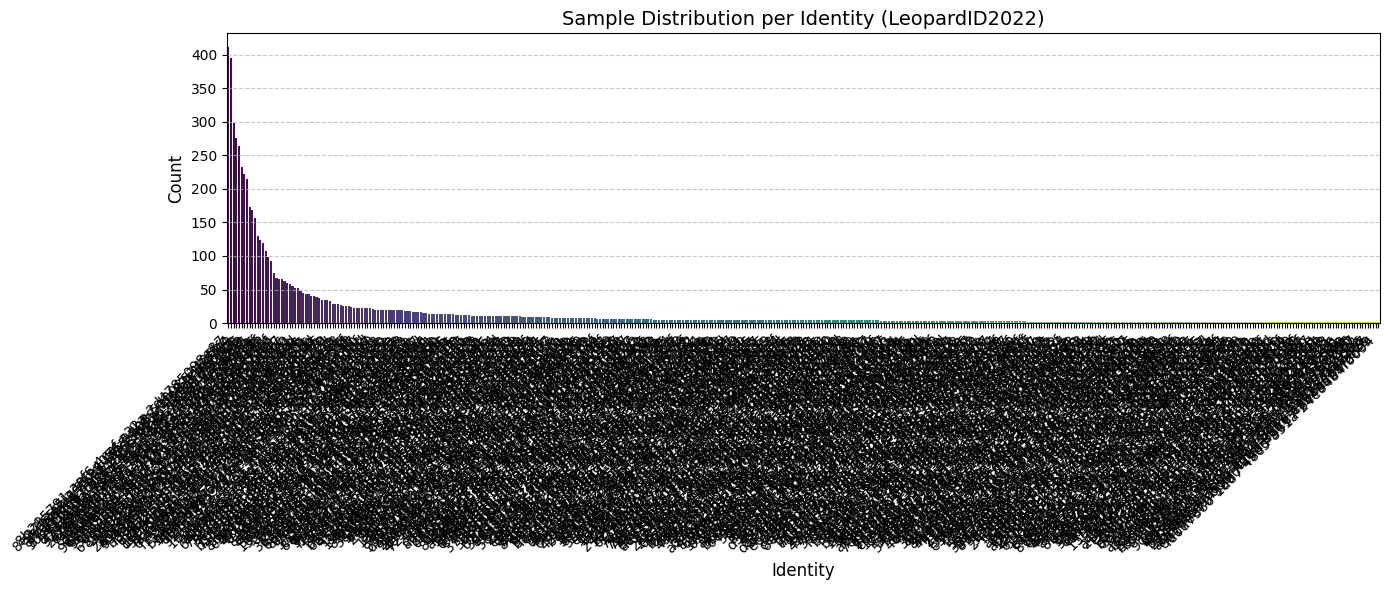

In [17]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(
    x=identity_counts.index, 
    y=identity_counts.values, 
    palette="viridis"
)
plt.title("Sample Distribution per Identity (LeopardID2022)", fontsize=14)
plt.xlabel("Identity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

In [ ]:
pd.read_c